# Object detection

 ### Mask RCNN

In [1]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/facebookresearch/Detectron.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone
  !git clone -q --depth 1 $git_repo_url
  # dependencies
  !cd $project_name && pip install -q -r requirements.txt
  # build
  !cd $project_name && make
# test Detectron
!python $project_name/detectron/tests/test_spatial_narrow_as_op.py 

import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

from IPython.display import clear_output

     |████████████████████████████████| 256kB 12.3MB/s 
python setup.py develop --user
Compiling detectron/utils/cython_bbox.pyx because it changed.
Compiling detectron/utils/cython_nms.pyx because it changed.
[1/2] Cythonizing detectron/utils/cython_bbox.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/Detectron/detectron/utils/cython_bbox.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/2] Cythonizing detectron/utils/cython_nms.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/Detectron/detectron/utils/cython_nms.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running develop
running egg_info
creating Detectron.egg-info
writing Detectron.egg-info/PKG-INFO
writi

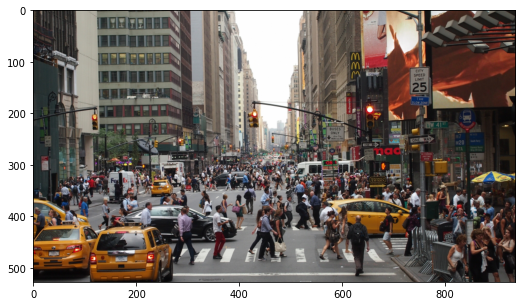

In [5]:
#IMAGE_URL = 'https://raw.githubusercontent.com/tugstugi/dl-colab-notebooks/master/resources/traffic_camera.jpg'
IMAGE_URL='https://i.postimg.cc/vBrLC1BF/pedestrian-road-traffic-street-town-city-546336-pxhere-com.jpg'
image_file = basename(IMAGE_URL)
image_file_ext = splitext(image_file)[1][1:]
images_dir = 'images'
!mkdir -p $images_dir && rm -rf $images_dir/*
!wget -q -O $images_dir/$image_file $IMAGE_URL

plt.figure(figsize=(10, 5))
plt.imshow(matplotlib.image.imread(join(images_dir, image_file)))

In [6]:
MODEL_CFG = 'e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml'
PRETRAINED_MODEL_URL = 'https://dl.fbaipublicfiles.com/detectron/36494496/12_2017_baselines/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml.07_50_11.fkwVtEvg/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl'

!cd $project_name && python tools/infer_simple.py \
    --cfg configs/12_2017_baselines/$MODEL_CFG \
    --wts $PRETRAINED_MODEL_URL \
    --thresh 0.7 \
    --output-dir ../output/ --output-ext png --always-out \
    --image-ext $image_file_ext \
    ../$images_dir

Found Detectron ops lib: /usr/local/lib/python3.6/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
WARNING cnn.py:  25: [====DEPRECATE WARNING====]: you are creating an object from CNNModelHelper class which will be deprecated soon. Please use ModelHelper object with brew module. For more information, please refer to caffe2.ai and python/brew.py, python/brew_test.py for more information.
INFO net.py:  60: Loading weights from: /tmp/detectron-download-cache/3649

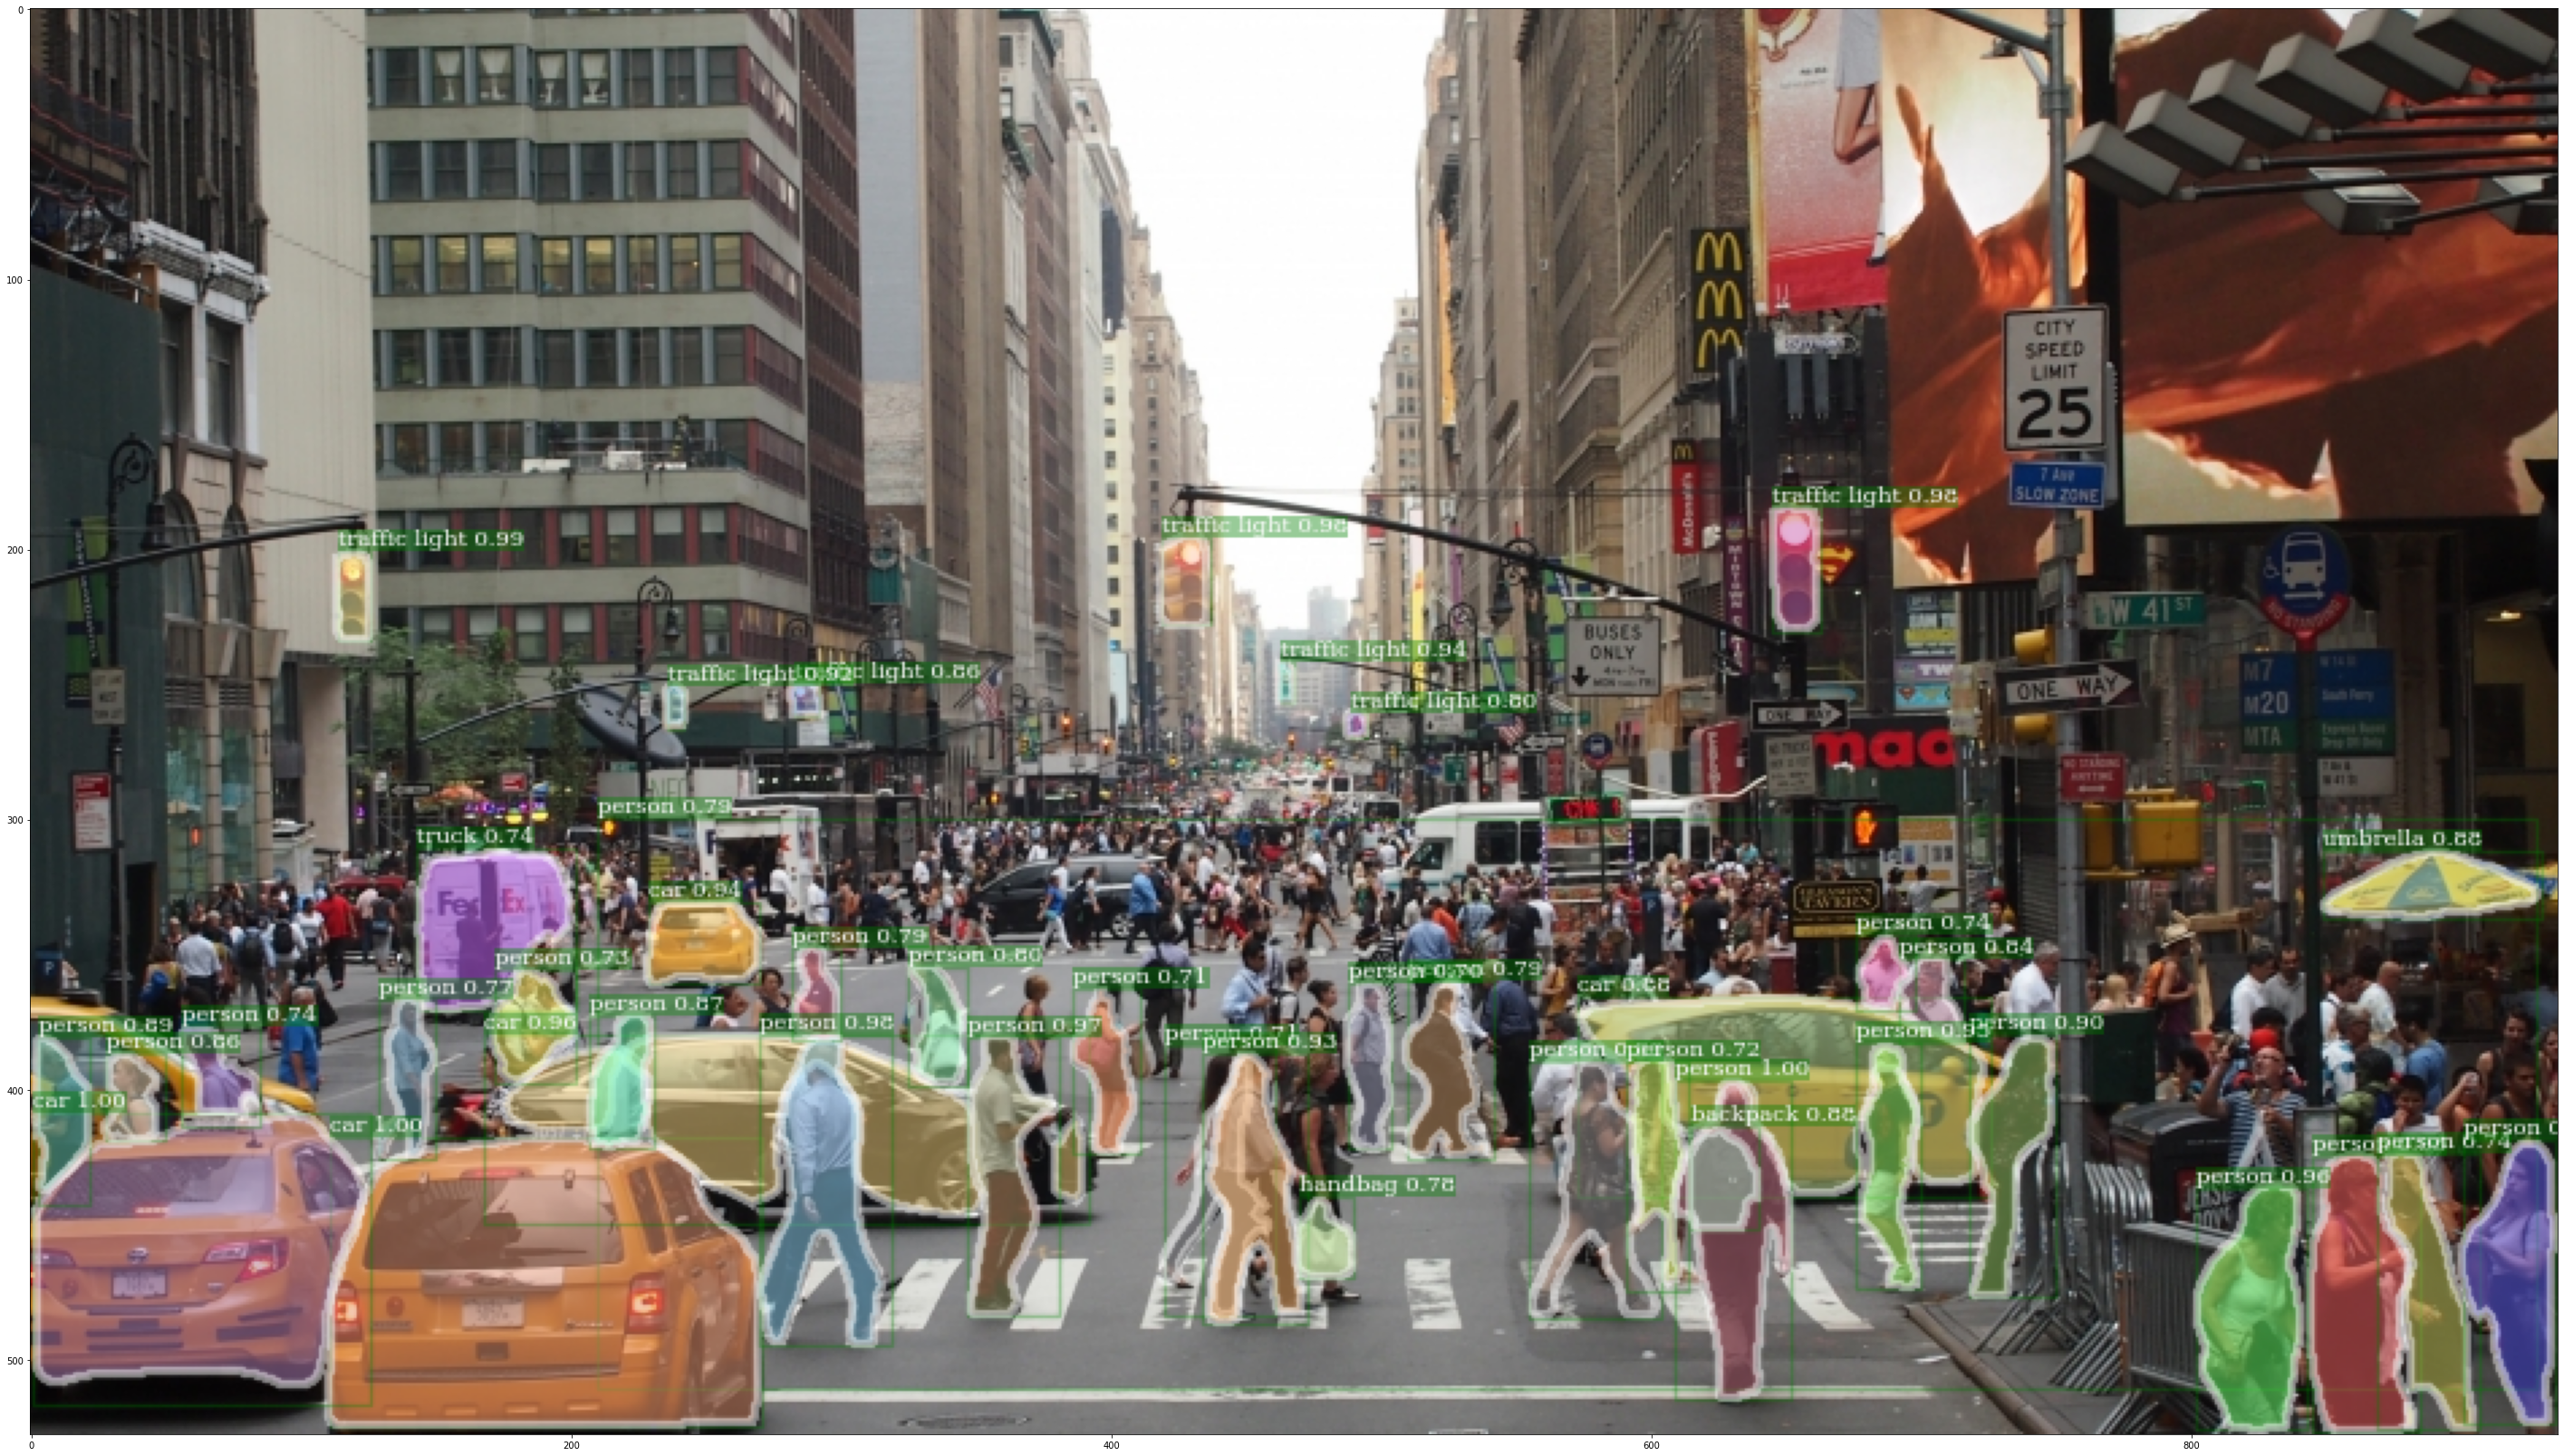

In [7]:
plt.figure(figsize=(50, 50))
plt.imshow(matplotlib.image.imread('output/%s.png' % image_file))